In [45]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from qml_hep_lhc.data import ElectronPhoton, MNIST, QuarkGluon
from qml_hep_lhc.models import QCNNHybrid
from tensorflow.keras.callbacks import ReduceLROnPlateau
import argparse
import numpy as np

import matplotlib.pyplot as plt
import time

In [47]:
args = argparse.Namespace()

# Data
args.resize = [8,8]
args.standardize = 1
args.binary_data = [0,1]
args.batch_size = 32
args.validation_split = 0.05
args.labels_to_categorical = 1
args.opt = 'Ranger'

# Base Model
args.learning_rate = 1e-3
args.epochs = 1

# Quantum CNN Parameters
args.n_layers = 1
args.feature_map = 'AmplitudeMap'
args.ansatz = "Cong"
args.sparse = 1

In [4]:
data = MNIST(args)
data.prepare_data()
data.setup()
print(data)

Binarizing data...
Binarizing data...
Resizing data...
Resizing data...
Standardizing data...
Converting labels to categorical...
Converting labels to categorical...

Dataset :MNIST
╒════════╤══════════════════╤════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size       │ Val size       │ Test size       │ Dims      │
╞════════╪══════════════════╪════════════════╪═════════════════╪═══════════╡
│ X      │ (12031, 8, 8, 1) │ (634, 8, 8, 1) │ (2115, 8, 8, 1) │ (8, 8, 1) │
├────────┼──────────────────┼────────────────┼─────────────────┼───────────┤
│ y      │ (12031, 2)       │ (634, 2)       │ (2115, 2)       │ (2,)      │
╘════════╧══════════════════╧════════════════╧═════════════════╧═══════════╛

╒══════════════╤═══════╤════════╤════════╤═══════╤══════════════════════════╕
│ Type         │   Min │    Max │   Mean │   Std │ Samples for each class   │
╞══════════════╪═══════╪════════╪════════╪═══════╪══════════════════════════╡
│ Train Images │ -1.58 │ 112.53 │      0 │  

In [5]:
model = QCNNHybrid(data.config(), args)

../../qml_hep_lhc/layers/qconv2d.py:59: UserWarning: Sparse mode is only supported for NQubit ansatz.
  'Sparse mode is only supported for NQubit ansatz.')
../../qml_hep_lhc/layers/qconv2d.py:61: UserWarning: n_qubits is only used for NQubit ansatz.
  warnings.warn('n_qubits is only used for NQubit ansatz.')


In [8]:
model.compile()
model.build_graph().summary()

../../qml_hep_lhc/encodings/amplitude.py:12: UserWarning: AmplitudeMap currently does not normalize the input unless padding is needed.
User must manually normalize the input.
  "AmplitudeMap currently does not normalize the input unless padding is needed.\nUser must manually normalize the input."


                                                                                                                             ┌──────────────┐   ┌──────────────┐   ┌──────────────┐
(0, 0): ───X^(θ0)───Y^(θ1)───Z^(θ2)───ZZ────────YY────────XX────────X^(θ9)────Y^(θ10)───Z^(θ11)───X^(θ3)───Y^(θ4)───Z^(θ5)───────────ZZ─────────────────YY─────────────────XX─────────X^(θ12)───Y^(θ13)───Z^(θ14)───X^(θ18)───Y^(θ19)───Z^(θ20)───@────────────────────────────────────
                                      │         │         │                                                                          │                  │                  │                                                                      │
(0, 1): ───X^(θ3)───Y^(θ4)───Z^(θ5)───ZZ^(θ6)───YY^(θ7)───XX^(θ8)───X^(θ12)───Y^(θ13)───Z^(θ14)───X^(θ0)───Y^(θ1)───Z^(θ2)────ZZ─────┼───────────YY─────┼───────────XX─────┼──────────X^(θ9)────Y^(θ10)───Z^(θ11)─────────────────────────────────┼────────────────────────────────────
                

../../qml_hep_lhc/encodings/amplitude.py:12: UserWarning: AmplitudeMap currently does not normalize the input unless padding is needed.
User must manually normalize the input.
  "AmplitudeMap currently does not normalize the input unless padding is needed.\nUser must manually normalize the input."


(0, 0): ───X^(θ0)───Y^(θ1)───Z^(θ2)───ZZ────────YY────────XX────────X^(θ9)────Y^(θ10)───Z^(θ11)───X^(θ3)───Y^(θ4)───Z^(θ5)───ZZ────────YY────────XX────────X^(θ12)───Y^(θ13)───Z^(θ14)───X^(θ18)───Y^(θ19)───Z^(θ20)───@────────────────────────────────────
                                      │         │         │                                                                  │         │         │                                                                     │
(0, 1): ───X^(θ3)───Y^(θ4)───Z^(θ5)───ZZ^(θ6)───YY^(θ7)───XX^(θ8)───X^(θ12)───Y^(θ13)───Z^(θ14)───X^(θ0)───Y^(θ1)───Z^(θ2)───ZZ^(θ6)───YY^(θ7)───XX^(θ8)───X^(θ9)────Y^(θ10)───Z^(θ11)───X^(θ15)───Y^(θ16)───Z^(θ17)───X───Z^(-θ17)───Y^(-θ16)───X^(-θ15)───
Model: "QCNNHybrid-AmplitudeMap-Cong"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 8, 1)]         0         
                                         

In [48]:
from qiskit import *
from qiskit.circuit import ParameterVector
import numpy as np

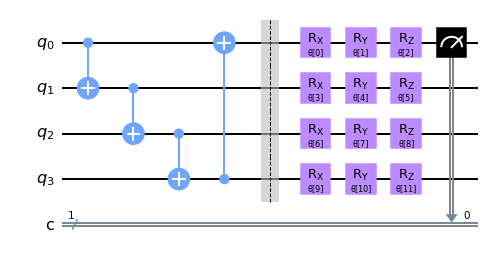

In [24]:
qc = QuantumCircuit(4,1)
theta = np.array(ParameterVector('θ', 3*4)).reshape(-1,3)

for i in range(3):
    qc.cnot(i,i+1)
qc.cnot(3,0)
qc.barrier()
for i in range(4):
    qc.rx(theta[i][0],i)
    qc.ry(theta[i][1],i)
    qc.rz(theta[i][2],i)
qc.measure(0,0)
qc.draw('mpl')

In [10]:
def one_qubit_unitary(thetas):
    qc = QuantumCircuit(1)
    qc.rx(thetas[0], 0)
    qc.ry(thetas[1], 0)
    qc.rz(thetas[2], 0)
    return qc

def two_qubit_unitary(thetas):
    qc = QuantumCircuit(2)
    qc = qc.compose(one_qubit_unitary(thetas[0:3]), [0])
    qc = qc.compose(one_qubit_unitary(thetas[3:6]), [1])
    qc.rzz(thetas[6],0, 1)
    qc.ryy(thetas[7],0, 1)
    qc.rxx(thetas[8],0, 1)
    qc = qc.compose(one_qubit_unitary(thetas[9:12]), [0])
    qc = qc.compose(one_qubit_unitary(thetas[12:]), [1])
    return qc

def two_qubit_pool(thetas):
    qc = QuantumCircuit(2)
    qc = qc.compose(one_qubit_unitary(thetas[0:3]), [1])
    qc = qc.compose(one_qubit_unitary(thetas[3:6]), [0])
    qc.cnot(0,1)
    qc = qc.compose(one_qubit_unitary(thetas[0:3]).inverse(), [1])
    return qc

def quantum_conv_circuit(bits, thetas):
    qc = QuantumCircuit(bits)
    bits = list(range(bits))
    for first, second in zip(bits[0::2], bits[1::2]):
        qc = qc.compose(two_qubit_unitary(thetas), [first,second])
    for first, second in zip(bits[1::2], bits[2::2] + [bits[0]]):
        qc = qc.compose(two_qubit_unitary(thetas), [first, second])
    return qc

def quantum_pool_circuit(sources, sinks, thetas):
    qc = QuantumCircuit(len(sources) + len(sinks))
    for source, sink in zip(sources, sinks):
        qc = qc.compose(two_qubit_pool(thetas), [source, sink])
    return qc

In [27]:
n = 4
ansatz = QuantumCircuit(n)
    
# Alternating conv and pool layers
i = 1
thetas = []
num_layers = 2 # Conv + pool layers
while (n//(2**(i-1)) >1):

    # conv layer
    bits = list(range(n - (n//(2**(i-1))), n))
    params_c = ParameterVector('θc'+str(i), length=16)
    ansatz.compose(quantum_conv_circuit(len(bits),params_c), bits, inplace=True)
    ansatz.barrier()
    thetas += list(params_c)

    # pooling layer
    l = len(bits)
    sources = list(range(l//2))
    sinks = list(range(l//2,l))

    params_p = ParameterVector('θp'+str(i), length=6)
    ansatz.compose(quantum_pool_circuit(sources, sinks, params_p), bits ,inplace=True)
    ansatz.barrier()
    thetas += list(params_p)

    i += 1

qc = QuantumCircuit(n,1)
qc.compose(ansatz, range(n),inplace=True)
qc.measure(-1,0)

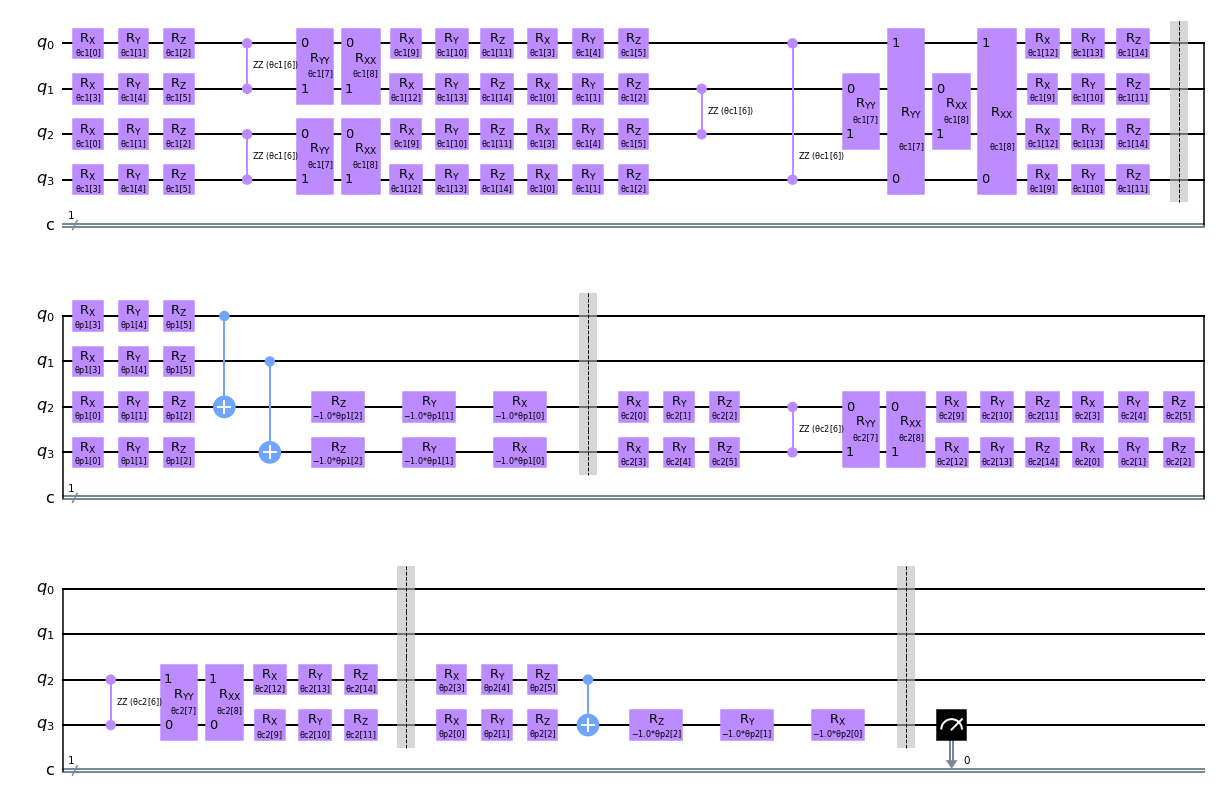

In [28]:
qc.draw('mpl')

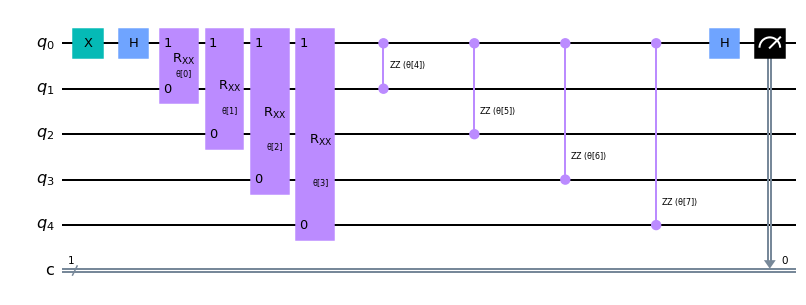

In [29]:
qc = QuantumCircuit(5,1)
qc.x(0)
qc.h(0)

theta = np.array(ParameterVector('θ', 2*4)).reshape(2,-1)

for i in range(4):
    qc.rxx(theta[0][i], i+1, 0)

for i in range(4):
    qc.rzz(theta[1][i], i+1, 0)

qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

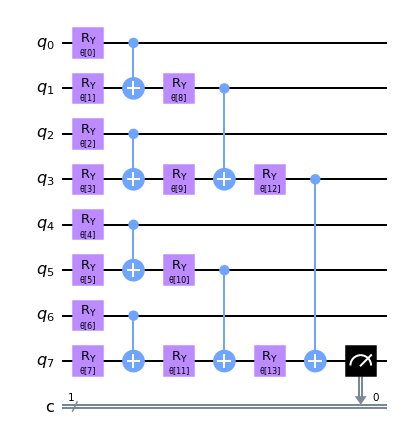

In [49]:
def block(symbols):
    qc = QuantumCircuit(2)
    qc.ry(symbols[0],0)
    qc.ry(symbols[1],1)
    qc.cnot(0,1)
    return qc

def _compute_indices(qubits, n_block_qubits):
    n_qubits = len(qubits)

    if n_block_qubits % 2 != 0:
        raise ValueError(
            f"n_block_qubits must be an even integer; got {n_block_qubits}"
        )

    if n_block_qubits < 2:
        raise ValueError(
            f"number of qubits in each block must be larger than or equal to 2; got n_block_qubits = {n_block_qubits}"
        )

    if n_block_qubits > n_qubits:
        raise ValueError(
            f"n_block_qubits must be smaller than or equal to the number of qubits; "
            f"got n_block_qubits = {n_block_qubits} and number of qubits = {n_qubits}"
        )

    if not np.log2(n_qubits / n_block_qubits).is_integer():
        warnings.warn(
            f"The number of qubits should be n_block_qubits times 2^n; got n_qubits/n_block_qubits = {n_qubits/n_block_qubits}"
        )

    n_qubits = 2**(int(np.log2(
        len(qubits) / n_block_qubits))) * n_block_qubits
    n_layers = int(np.log2(n_qubits // n_block_qubits)) + 1

    layers = [[
        qubits[i] for i in range(
            x + 2**(j - 1) * n_block_qubits // 2 - n_block_qubits // 2,
            x + n_block_qubits // 2 + 2**(j - 1) * n_block_qubits // 2 -
            n_block_qubits // 2,
        )
    ] + [
        qubits[i] for i in range(
            x + 2**(j - 1) * n_block_qubits // 2 +
            2**(j - 1) * n_block_qubits // 2 - n_block_qubits // 2,
            x + 2**(j - 1) * n_block_qubits // 2 + n_block_qubits // 2 +
            2**(j - 1) * n_block_qubits // 2 - n_block_qubits // 2,
        )
    ] for j in range(1, n_layers + 1)
              for x in range(0, n_qubits -
                             n_block_qubits // 2, 2**(j - 1) *
                             n_block_qubits)]

    return layers

n_qubits = 8
n_block_qubits = 2
n_params_block = 2
ind_gates = _compute_indices(list(range(n_qubits)), n_block_qubits)
n_blocks = int(2**int(np.log2(n_qubits / n_block_qubits)) * 2 - 1)
assert len(ind_gates) == n_blocks

# Sympy symbols for variational angles
theta = np.array(ParameterVector('θ', n_params_block*n_blocks)).reshape(n_blocks,n_params_block)


qc = QuantumCircuit(n_qubits,1)

for idx, w in enumerate(ind_gates):
    qc.compose(block(theta[idx]),w, inplace=True)

qc.measure(-1,0)
qc.draw('mpl')

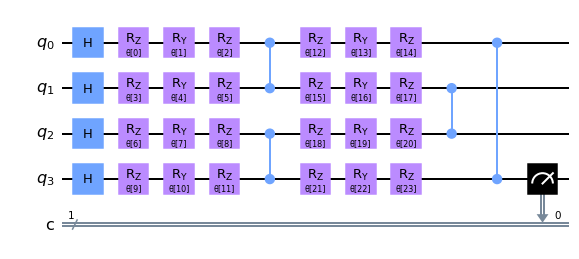

In [53]:
def generate_circuit(n_qubits, n_layers):
    
    all_qubits = [i for i in range(n_qubits)]
    
    w = ParameterVector('θ', length= n_layers*n_qubits*3)
    w = np.asarray(w).reshape((n_layers, n_qubits,3))
    
    circuit = QuantumCircuit(n_qubits,1)
    circuit.h(all_qubits)

    for l in range(n_layers):
        for q in all_qubits:
            circuit.rz(w[l][q][0], q)
            circuit.ry(w[l][q][1], q)
            circuit.rz(w[l][q][2], q)
        if (l & 1):
            for q0, q1 in zip(all_qubits[1::2], all_qubits[2::2] + [all_qubits[0]]):
                circuit.cz(q0,q1)
        else:
            for q0, q1 in zip(all_qubits[0::2], all_qubits[1::2]):                 
                circuit.cz(q0,q1)
                
    return circuit

qc = generate_circuit(4,2)
qc.measure(-1,0)
qc.draw('mpl')

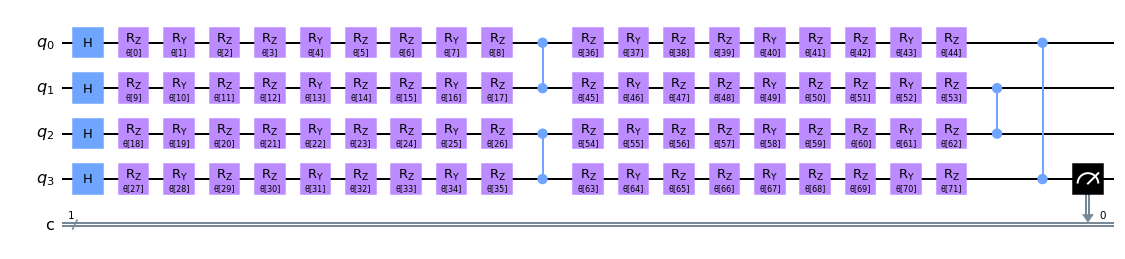

In [54]:
def generate_circuit(n_qubits, n_layers):
    
    all_qubits = [i for i in range(n_qubits)]
    
    w = ParameterVector('θ', length= n_layers*n_qubits*9)
    w = np.asarray(w).reshape((n_layers, n_qubits,9))
    
    circuit = QuantumCircuit(n_qubits,1)
    circuit.h(all_qubits)

    for l in range(n_layers):
        for q in all_qubits:
            circuit.rz(w[l][q][0], q)
            circuit.ry(w[l][q][1], q)
            circuit.rz(w[l][q][2], q)
            circuit.rz(w[l][q][3], q)
            circuit.ry(w[l][q][4], q)
            circuit.rz(w[l][q][5], q)
            circuit.rz(w[l][q][6], q)
            circuit.ry(w[l][q][7], q)
            circuit.rz(w[l][q][8], q)
        if (l & 1):
            for q0, q1 in zip(all_qubits[1::2], all_qubits[2::2] + [all_qubits[0]]):
                circuit.cz(q0,q1)
        else:
            for q0, q1 in zip(all_qubits[0::2], all_qubits[1::2]):                 
                circuit.cz(q0,q1)
                
    return circuit

qc = generate_circuit(4,2)
qc.measure(-1,0)
qc.draw('mpl')

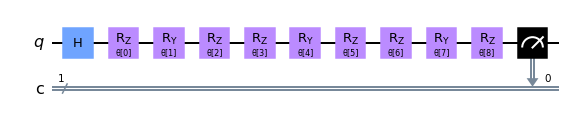

In [55]:
qc = generate_circuit(1,1)
qc.measure(-1,0)
qc.draw('mpl')